In [1]:
import pandas as pd
import pickle
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2023-09-25 16:30:28.431665: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-09-25 16:30:28.431687: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


local_logs/MNIST/weights-(-1)-HC-All-0.5/evaluate/acc_50clients_1clusters.csv
5000
local_logs/MNIST/weights-(-1)-KCenter-All-0.5/evaluate/acc_50clients_5clusters.csv
5000


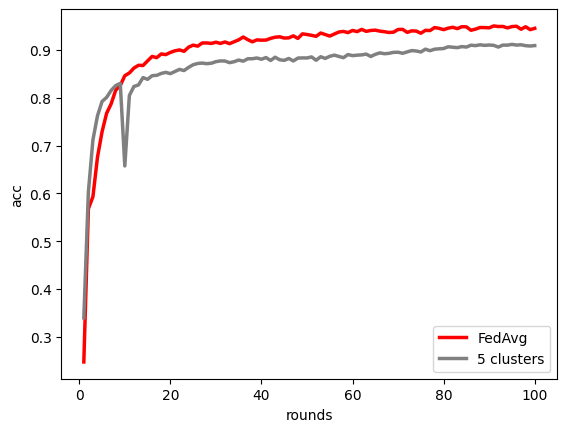

In [32]:
#comparando o numero de clusters

metric = 'weights'
selection = 'All'
method = 'KCenter'

files = {'FedAvg':      f'local_logs/MNIST/weights-(-1)-HC-{selection}-0.5/evaluate/acc_50clients_1clusters.csv',
         '5 clusters':  f'local_logs/MNIST/{metric}-(-1)-{method}-{selection}-0.5/evaluate/acc_50clients_5clusters.csv' }

solucoes = ['FedAvg','5 clusters']
colors =  {'FedAvg':'r', '2 clusters'   :'k', '5 clusters':'gray' , '10 clusters':'blue' ,'20 clusters':'cyan'}
styles =  {'FedAvg':'-', '2 clusters'   :'-.', '5 clusters':':' , '10 clusters':'--' ,'20 clusters':'-'}
markers = {'FedAvg':'>', '2 clusters'   :'X', '5 clusters':'o' , '10 clusters':'v' ,'20 clusters':'s'}


for sol in solucoes:
    print(files[sol])
    acc =  pd.read_csv(files[sol] , names=['rounds', 'client', 'acc', 'loss'],  on_bad_lines='skip')
    print(len(acc))

    sns.lineplot(acc.groupby('rounds').mean(), y = 'acc', x = 'rounds',
                  linewidth = 2.5, color = colors[sol],  label=sol)

